# <div align = 'center'> Lectura 7 Series de Tiempo III</div>
### Contenido
  <div align = 'left'>
      <font color = 'steelblue' size = 4>
        7.1 Métodos predictivos <br>
        7.2 Modelo Naive <br>
        7.3 Validación <br>
        7.4 Modelo autorregresivo (AR) <br>
          </font>
        </div>

## Métodos predictivos

La previsión de series de tiempo es un tema con muchas aplicaciones posibles, como la previsión de precios de activos, la previsión meteorológica, la planificación empresarial, la asignación de recursos y muchas otras.

Una serie de tiempo generalmente se modela bajo un proceso estocástico $Y(t)$, es decir, una secuencia de variables aleatorias. En un pronóstico, actualmente estamos en $t$ y nos interesa estimar $Y(t+1) $, utilizando solo la información disponible hasta el momento $t$.

## Modelo Naive

El modelo _ingenuo_ es el ejemplo más básico e "inocente" de un predictor para una serie de tiempo. La idea del modelo es que el valor de pronóstico para el período actual $ t $ es igual al valor del período $ t-1 $. Para demostrar la aplicación del modelo _ingenuo_, usaremos los datos contenidos en el archivo ```shampoo.csv```, que representan las ventas mensuales de shampoo.

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('shampoo.csv')
df.Month = pd.to_datetime(df.Month)
df.set_index('Month', inplace=True)
df.head()

,Sales
Month,
2000-01-01,266.0
2000-02-01,145.9
2000-03-01,183.1
2000-04-01,119.3
2000-05-01,180.3


Para evaluar la calidad del modelo, pronosticaremos toda la serie de tiempo usando el comando ```Series.shift()```. Crearemos una nueva columna llamada ```Sales_prediction``` como el desplazamiento de un período de la columna ```Sales```.

In [13]:
df['naive_prediction'] = df.Sales.shift(1)
df.head()

,Sales,naive_prediction
Month,,
2000-01-01,266.0,NaN
2000-02-01,145.9,266.0
2000-03-01,183.1,145.9
2000-04-01,119.3,183.1
2000-05-01,180.3,119.3


Al graficar las dos series, es posible observar el comportamiento del modelo.

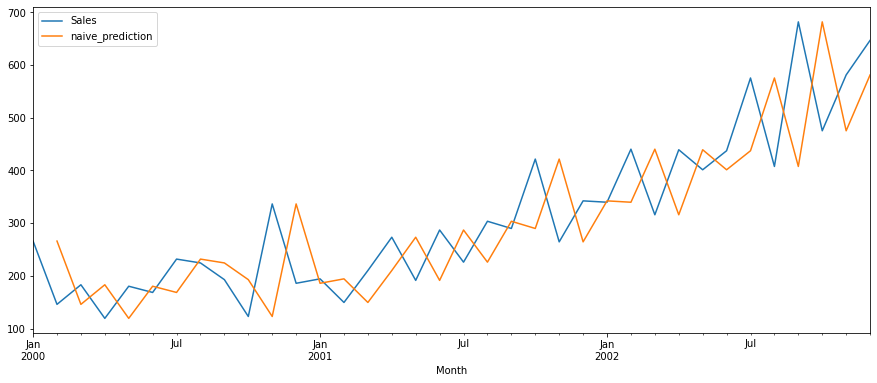

In [14]:
df.plot(figsize=(15, 6))

### Validación

Validaremos el modelo _Naive_ calculando la raíz del error cuadrático medio entre las predicciones y los valores observados. Para hacerlo, calcularemos la diferencia cuadrática entre la columna ```Ventas``` y la columna ```naive_prediction```. Almacenaremos la ```Serie``` generada en una variable llamada ```errores```. Para calcular la media del error usamos el comando ```Series.mean()```.

In [15]:
((df.Sales - df.naive_prediction) ** 2).mean()

11715.388285714287

El modelo _Naive_ se utiliza como referencia para modelos más sofisticados. La idea es que los modelos de pronóstico tienen un error cuadrático medio más bajo que el modelo _Naive_. De lo contrario, tenemos un modelo extremadamente ineficaz.

## Modelo Autorregresivo (AR)

En modelos de regresión múltiple, predecimos la variable de interés usando la combinación lineal de las variables predictoras. En un modelo autorregresivo, predecimos la variable de interés usando la combinación lineal de valores pasados de la misma variable. El término autorregresivo indica que el proceso se define como un modelo de regresión de una variable por sí misma.


Por tanto, un modelo autorregresivo de orden $ p $ puede escribirse como

$$ y_t = c + \beta_1y_ {t-1} + \beta_2y_ {t-2} + \cdots + \beta_p y_ {t - p} + \epsilon_t $$

donde $ \epsilon_t $ es ruido blanco. Nos referimos a un modelo AR ($ p $) como un modelo autorregresivo de orden $ p $.

Implementaremos un modelo AR(1) para el ejemplo de shampoo. Para hacer esto, crearemos un nuevo ```DataFrame``` llamado ``` df1``` que contiene la columna ```Sales``` y la columna ``` x1```. Donde ```x1``` representa el monto de la venta con _lag_ de 1 período.

In [16]:
df.head()

,Sales,naive_prediction
Month,,
2000-01-01,266.0,NaN
2000-02-01,145.9,266.0
2000-03-01,183.1,145.9
2000-04-01,119.3,183.1
2000-05-01,180.3,119.3


In [21]:
df1 = df.drop('naive_prediction', axis=1)
df1['x1'] = df1.Sales.shift(1)
df1.dropna(axis=0, inplace=True)
df1.head()

,Sales,x1
Month,,
2000-02-01,145.9,266.0
2000-03-01,183.1,145.9
2000-04-01,119.3,183.1
2000-05-01,180.3,119.3
2000-06-01,168.5,180.3


Trataremos el modelo AR (1) como una regresión lineal simple, donde ```x1``` es la variable independiente y ```Ventas``` es la variable dependiente. Usando la clase ```LinearRegression``` del paquete ```sklearn```, podemos crear el modelo de regresión que es equivalente al modelo autorregresivo AR (1).

In [27]:
from sklearn.linear_model import LinearRegression

X = df1.x1.values
y = df1.Sales.values

reg = LinearRegression().fit(X.reshape(-1, 1), y)
predictions = reg.predict(X.reshape(-1, 1))
errors = (y - predictions) ** 2
errors.mean()


10668.73613429366

Ejecutando el modelo de regresión para AR (1) obtenemos $10668.73 $, un valor menor al obtenido con el modelo _Naive_. A continuación se muestra una representación visual del modelo de regresión lineal.

Text(0, 0.5, 'Sales')

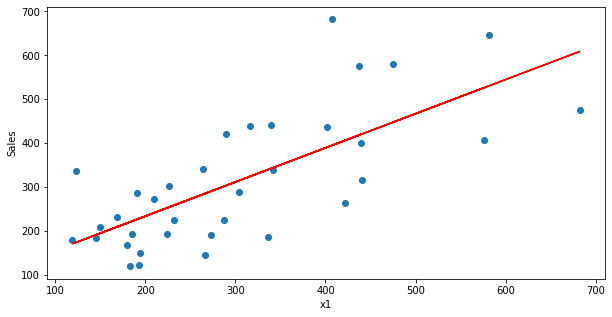

In [28]:
plt.scatter(X, y)
plt.plot(X, reg.predict(X.reshape(-1, 1)), color='red')
plt.xlabel('x1')
plt.ylabel('Sales')

Para ver el modelo en forma de serie de tiempo, crearemos una nueva columna en el ```DataFrame``` ``` df1``` llamada ```ar_1```.

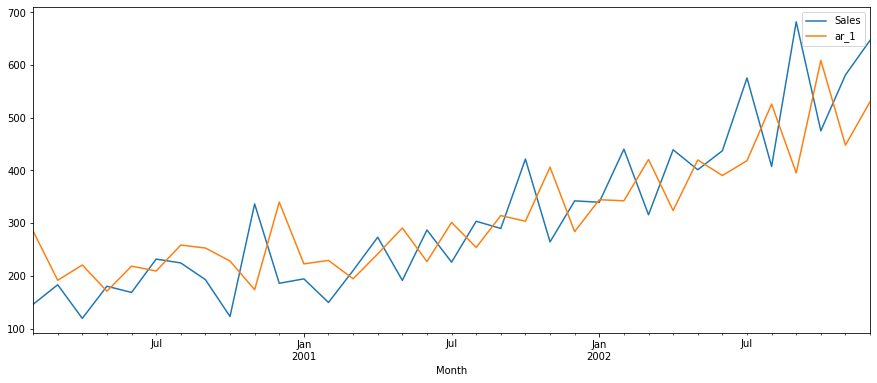

In [29]:
df1['ar_1'] = reg.predict(X.reshape(-1, 1))
df1[['Sales', 'ar_1']].plot(figsize=(15, 6))

Ahora aplicaremos el modelo de regresión para AR (2). Para eso, agregaremos la columna denominada ```x2```, que representa el _lag_ de 2 puntos. En este caso, tenemos un modelo de regresión lineal múltiple con ```x1``` y ```x2``` como variables independientes y ```Ventas``` como variable dependiente.

In [30]:
df1['x2'] = df.Sales.shift(2)
df1.dropna(axis=0, inplace=True)
df1.head()

,Sales,x1,ar_1,x2
Month,,,,
2000-03-01,183.1,145.9,191.610723,266.0
2000-04-01,119.3,183.1,220.566317,145.9
2000-05-01,180.3,119.3,170.905917,183.1
2000-06-01,168.5,180.3,218.386864,119.3
2000-07-01,231.8,168.5,209.202025,180.3


In [32]:
X = df1[['x1', 'x2']]
y = df1.Sales.values

reg2 = LinearRegression().fit(X, y)
predictions = reg2.predict(X)
errors = (y - predictions) ** 2
errors.mean()

5154.048667052169

El nuevo modelo tiene $5154.04 $

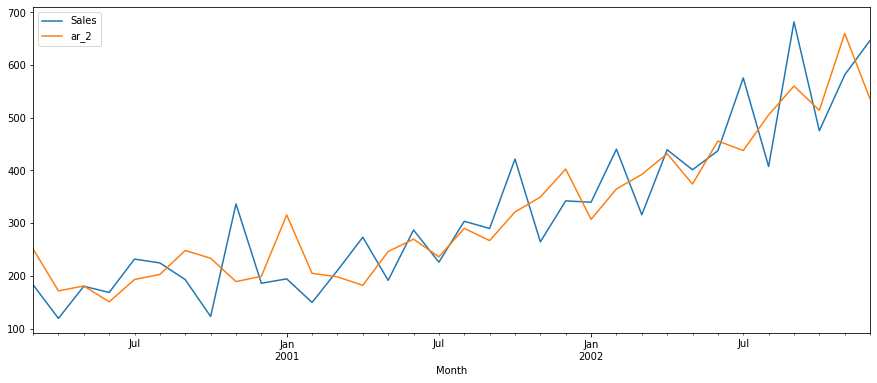

In [33]:
df1['ar_2'] = reg2.predict(X)
df1[['Sales', 'ar_2']].plot(figsize=(15, 6))

### Usando el paquete statsmodels

Para facilitar el uso de modelos autorregresivos, usaremos el paquete ```statsmodels```. El modelo autorregresivo se encuentra en el subpaquete ```tsa.ar_model```. Para importar usamos el comando ```from statsmodels.tsa.ar_model import AR```. Para crear el modelo, usamos el comando ``` AR (Serie).fit(p) ```, donde $ p $ es el número de periodos pasados (_lag_) considerados en el modelo.

Crearemos el modelo AR (2) para compararlo con el resultado generado anteriormente. Llamaremos al modelo creado ```ar_2```.

In [37]:
from statsmodels.tsa.ar_model import AR
import warnings
warnings.filterwarnings('ignore')

ar_2 = AR(df.Sales, freq='MS').fit(2)


Usando el atributo ``` resid```, obtenemos los errores residuales de las predicciones para cada periodo de la serie en forma de un objeto pandas ```Series```. Podemos usar esta información para calcular el error al cuadrado del modelo elevando la ```Serie``` que contiene los errores residuales en 2 y promediando el resultado.

In [38]:
(ar_2.resid ** 2).mean()

5154.048667052169

El resultado obtenido es el mismo que el modelo creado a partir del modelo de regresión lineal.
Para analizar descriptivamente los errores del modelo, tenemos la posibilidad de utilizar el comando ```Series.describe ()```.

In [39]:
ar_2.resid.describe()

count    3.400000e+01
mean     9.111666e-14
std      7.287134e+01
min     -1.213016e+02
25%     -5.535156e+01
50%      3.538038e+00
75%      3.114397e+01
max      1.473753e+02
dtype: float64

El promedio de errores es muy cercano a cero, lo que indica que no hay mayor proporción de errores hacia arriba o hacia abajo. La desviación estándar nos da una noción de la variabilidad del error y los cuartiles muestran su distribución.

Para facilitar el análisis de la distribución de errores, podemos utilizar histogramas y gráficos de diagrama de caja. Generamos el diagrama de caja de los errores usando el comando ```Series.plot(kind = 'box')```.

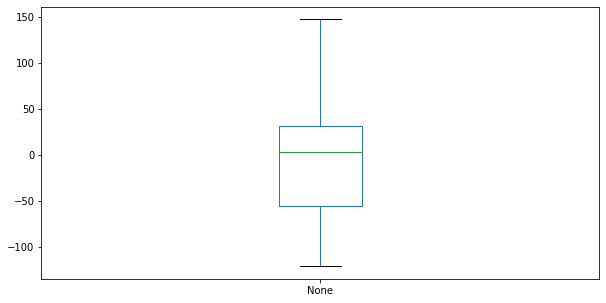

In [44]:
ar_2.resid.plot(kind='box')

Analizando la gráfica, notamos que la mediana (representada por la línea verde) es cercana a cero (con un valor igual a 3.53). La posición de la mediana en el "cuadro" de la gráfica de caja indica que los errores están más dispersos por debajo de la mediana.

El análisis se puede completar utilizando el histograma de errores. Para crear el histograma usamos el comando ```Series.hist()```.

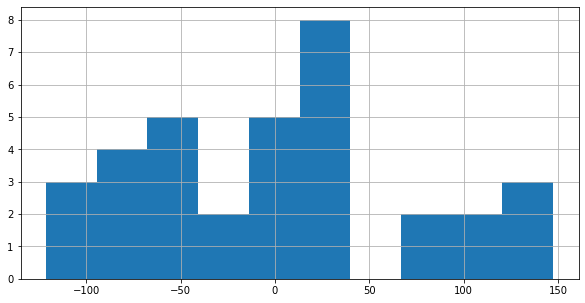

In [45]:
ar_2.resid.hist()

Analizando la distribución de la frecuencia de errores, observamos que, aunque la media se concentra en cero, los errores por debajo de la media están más distribuidos que los errores por encima de la media.

Finalmente, analizaremos el modelo AR (3).

In [46]:
ar_3 = AR(df.Sales, freq='MS').fit(3)
(ar_3.resid ** 2).mean()

4389.2704116893665

Para predecir un período de tiempo específico, configuraremos los parámetros ```start``` y ```end``` del comando ```predict()```. En el ejemplo, tenemos importes de ventas hasta el periodo '2002-12'. Pronosticaremos las ventas para el próximo período haciendo ```start = '2003-01``` y ```end ='2003-01'```. Crearemos una variable llamada ```forecast``` para almacenar el pronóstico ```Serie``` resultante y trazar el resultado usando un gráfico ```plt.scatter()```.

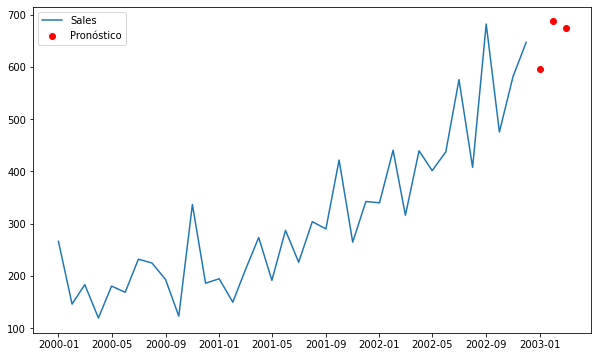

In [52]:
plt.figure(figsize=(10, 6))
plt.plot(df.Sales)
forecast = ar_3.predict(start='2003-01', end='2003-03')
plt.scatter(forecast.index, forecast.values, color='red')
plt.legend(['Sales', 'Pronóstico'])

In [50]:
ar_3.predict(start='2003-01-01', end='2003-02-01')

2003-01-01    595.230272
2003-02-01    686.891063
Freq: MS, dtype: float64